In [ ]:
!pip install kaggle
!pip install matplotlib
!pip3 install opencv-python
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install openpyxl
# Pandas is optional and need to use only if we want to use the data from the url of the images and not locally
!pip install pandas

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "kishantrivedi"
os.environ['KAGGLE_KEY'] = "ced8872eb56dccbfb5f3fb1b73bcc1ba"

In [3]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip covid19-radiography-database.zip

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [4]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [5]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1.png')

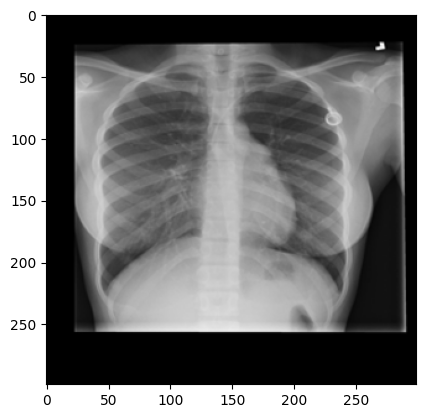

In [6]:
plt.imshow(img)

In [7]:
img.shape

(299, 299, 3)

In [8]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [9]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [10]:
path = "COVID-19_Radiography_Dataset/COVID/images" + urls[0]

In [11]:
def loadImages(path,urls, target): #Target is to define the class of image, for example 1 for covid and 0 for normal.
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    img = cv2.resize(img,(100,100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [12]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [13]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [14]:
# covidImages = np.asarray(covidImages)
# normalImages = np.asarray(normalImages)

In [15]:
covidImages.shape

(3616, 100, 100, 3)

In [16]:
normalImages.shape

(10192, 100, 100, 3)

In [17]:
data = np.r_[covidImages, normalImages]

In [18]:
data.shape

(13808, 100, 100, 3)

In [19]:
targets = np.r_[covidTargets, normalTargets]

In [20]:
targets.shape

(13808,)

In [21]:
# data = data / 255.0

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [29]:
model = Sequential ([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 16)      

In [31]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
324/324 [==============================] - 16s 9ms/step - loss: 0.3849 - accuracy: 0.8176 - val_loss: 0.2927 - val_accuracy: 0.8728
Epoch 2/5
324/324 [==============================] - 2s 6ms/step - loss: 0.2630 - accuracy: 0.8862 - val_loss: 0.2284 - val_accuracy: 0.9032
Epoch 3/5
324/324 [==============================] - 2s 6ms/step - loss: 0.2120 - accuracy: 0.9111 - val_loss: 0.1855 - val_accuracy: 0.9238
Epoch 4/5
324/324 [==============================] - 2s 6ms/step - loss: 0.1639 - accuracy: 0.9337 - val_loss: 0.1716 - val_accuracy: 0.9313
Epoch 5/5
324/324 [==============================] - 2s 6ms/step - loss: 0.1352 - accuracy: 0.9468 - val_loss: 0.1479 - val_accuracy: 0.9397


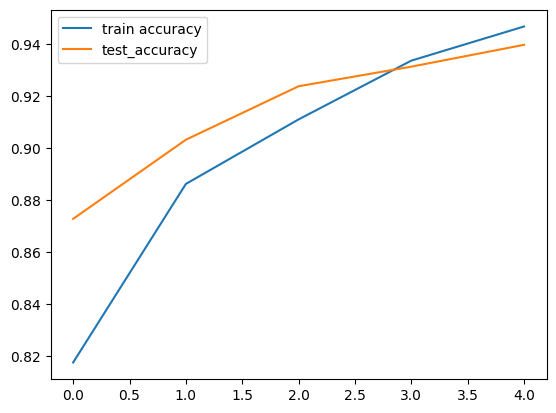

In [35]:
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.show()

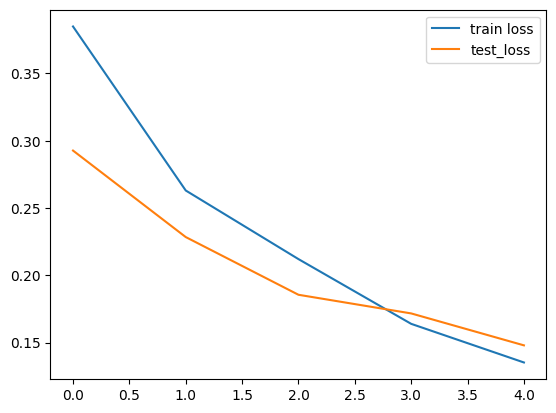

In [36]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

In [37]:
tf.keras.models.save_model(model, 'saved_model')

In [39]:
!zip -r saved_model.zip saved_model/


  adding: saved_model/ (stored 0%)
  adding: saved_model/saved_model.pb (deflated 89%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/keras_metadata.pb (deflated 92%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 65%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 14%)


In [41]:
# Fetch the model from the storage
# model = tf.keras.models.load_model('saved_model')

In [60]:
def preprocess(image):
  image = cv2.imread(image)
  image = image / 255.0
  image = cv2.resize(image,(100,100))
  return image

In [61]:
from PIL import Image

In [105]:
image = str("/content/positive1.jpg")
# image = Image.open(image_file_path)

In [106]:
preprocessed_input = preprocess(image)

In [107]:
preprocessed_input.shape

(100, 100, 3)

In [108]:
preprocessed_input = np.expand_dims(preprocessed_input, axis=0)

In [109]:
preprocessed_input.shape

(1, 100, 100, 3)

In [110]:
predictions = model.predict(preprocessed_input)

1/1 [==============================] - 0s 26ms/step


In [111]:
print(predictions)

[[0.94523627]]


In [113]:
# Assuming 'predictions' is the output from your model
predicted_prob_class_1 = predictions[0][0]

# Calculate the complementary probability for class 0
predicted_prob_class_0 = 1.0 - predicted_prob_class_1

# Define the class labels
class_labels = [0, 1]

# Apply a threshold (0.5) to make the final prediction
threshold = 0.5

if predicted_prob_class_1 >= threshold:
    predicted_class = class_labels[1]  # Class 1
    result = "Positive"
else:
    predicted_class = class_labels[0]  # Class 0
    result = "Negative"

print("Predicted Class:", result)

Predicted Class: Positive
